NameError: name 'X_set' is not defined

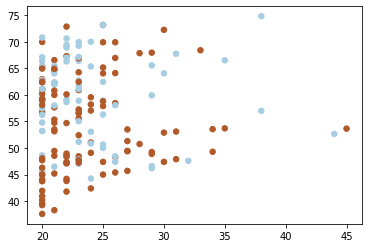

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tikzplotlib
from sklearn import svm
from skimage import measure
from sklearn.datasets import make_blobs, make_circles
from sklearn.svm import SVC
from tikzplotlib import save as tikz_save
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

#plt.close('all')
dataset = pd.read_csv('/home/inlab/Downloads/data extraction_0125_v1.csv')
# we create 50 separable points
#X, y = make_blobs(n_samples=40, centers=2, random_state=6)
#X,  y  = make_circles(n_samples=50, factor=0.5, random_state=4, noise=.05)
#X2, y2 = make_circles(n_samples=50, factor=0.2, random_state=5, noise=.08)
X = dataset.drop(['IsTrustable'], axis=1)#drop the targer feature and use all the remaining features in our datafile
X1 = dataset.drop(['IsTrustable'], axis=1)
y = dataset['IsTrustable']
#X = np.append(X,X2, axis=0)
#y = np.append(y,y2, axis=0)

# shifte X to [0,2]x[0,2]
#X = np.array([[item[0] + 1, item[1] + 1] for item in X])
#X[X<0] = 0.01

clf = svm.SVC(kernel='rbf', C=1000)
clf.fit(X, y)

plt.scatter(X.iloc[:, 3], X.iloc[:, 4], c=y, s=30, cmap=plt.cm.Paired)


# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
#xx = np.linspace(xlim[0], xlim[1], 30)
#yy = np.linspace(ylim[0], ylim[1], 30)
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

YY, XX = np.meshgrid(yy, xx)
#xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--','-','--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')


################## KERNEL TRICK - 3D ##################

#trans_X = np.array([[item[0], item[1],item[2] ] for item in X1])
trans_X = np.array([[item[1], item[3],item[4] ] for item in X])

fig = plt.figure()
ax = plt.axes(projection ="3d")

# creating scatter plot
ax.scatter3D(trans_X.iloc[:,0],trans_X.iloc[:,1],trans_X.iloc[:,2], c = y, cmap=plt.cm.Paired)

#clf2 = svm.SVC(C=1000.0, cache_size=200,class_weight=None, coef0=0.0,gamma='auto',kernel='rbf',max_iter=-1,probability=False,random_state=None,shrinking=True,tol=0.001,verbose=False)
clf = svm.SVC(kernel='rbf', C=1000)
clf2.fit(trans_X, y)


z = lambda x,y: (-clf2.intercept_[0]-clf2.coef_[0][0]*x-clf2.coef_[0][1]*y) / clf2.coef_[0][2]

ax = plt.gca(projection='3d')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
zlim = ax.get_zlim()

### from here i don't know what to do ###
xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
zz = np.linspace(zlim[0], zlim[1], 50)
XX ,YY, ZZ = np.meshgrid(xx, yy, zz)
xyz = np.vstack([XX.ravel(), YY.ravel(), ZZ.ravel()]).T
Z = clf2.decision_function(xyz).reshape(XX.shape)

# find isosurface with marching cubes
dx = xx[1] - xx[0]
dy = yy[1] - yy[0]
dz = zz[1] - zz[0]
verts, faces, _, _ = measure.marching_cubes_lewiner(Z, 0, spacing=(1, 1, 1), step_size=2)
verts *= np.array([dx, dy, dz])
verts -= np.array([xlim[0], ylim[0], zlim[0]])

# add as Poly3DCollection
mesh = Poly3DCollection(verts[faces])
mesh.set_facecolor('g')
mesh.set_edgecolor('none')
mesh.set_alpha(0.3)
ax.add_collection3d(mesh)
ax.view_init(20, -45)
plt.savefig('kerneltrick')

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 176 and the array at index 1 has size 1

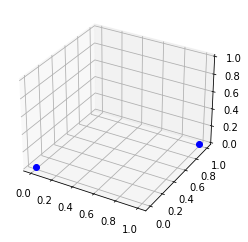

In [2]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from mpl_toolkits.mplot3d import Axes3D
dataset = pd.read_csv('/home/inlab/Downloads/data extraction_0125_v1.csv')
X = dataset.drop(['NoPeers','MaxDelay','IsTrustable'], axis=1)
#X = dataset.[:, :3]  # we only take the first three features.
Y = dataset['IsTrustable']
X.head()
#make it binary classification problem


model = svm.SVC(kernel='linear')
clf = model.fit(X, Y)

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]

tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(Y==0,'ob')
ax.plot3D(Y==1,'sr')
ax.plot_surface(x, y, z(x,y))
ax.view_init(30, 60)
plt.show()

Widget Javascript not detected.  It may not be installed or enabled properly.


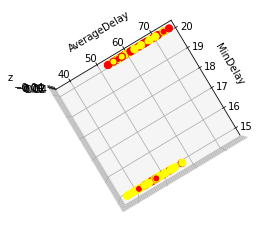

In [3]:
from sklearn.svm import SVC
from ipywidgets import interact ,fixed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from mpl_toolkits.mplot3d import Axes3D
dataset = pd.read_csv('/home/inlab/Downloads/data extraction_0125_v1.csv')
#X = dataset.drop(['# of Peers','MaxDelay','TPS','IsTrustable'], axis=1)
X = dataset.drop(['Endorsing','MaxDelay','MinDelay','IsTrustable'], axis=1)
#X = dataset.[:, :3]  # we only take the first three features.
y = dataset['IsTrustable']
r = np.exp(-(X ** 2).sum(1))
X.head()

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    #ax.scatter3D(X.iloc[:, 0], X.iloc[:, 1],X.iloc[:, 2] , c=y, s=50, cmap='autumn')
    ax.scatter3D(X.iloc[:, 0], X.iloc[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('MinDelay')
    ax.set_ylabel('AverageDelay')
    ax.set_zlabel('z')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));
#yellow is 1 and trustable node set
#red is 0 and non-trustable node set


Value of C :  1000


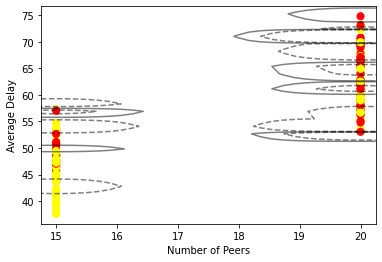

In [4]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
clf = SVC(kernel='rbf', C=1000, gamma = 1)
clf.fit(X, y)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');
plt.xlabel('Number of Peers')
plt.ylabel('Average Delay')
print("Value of C : ",clf.C)
#yellow is 1 and trustable node set
#red is 0 and non-trustable node set

Text(0.5, 0, 'TPS')

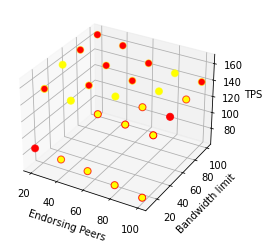

In [3]:
from sklearn.svm import SVC
from ipywidgets import interact ,fixed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from mpl_toolkits.mplot3d import Axes3D
dataset = pd.read_csv('/home/inlab/Documents/hyperledgerTPSdata.csv')
#X = dataset.drop(['# of Peers','MaxDelay','TPS','IsTrustable'], axis=1)

X = dataset  # we only take the first three features.
y = dataset['Trustable']
r = np.exp(-(X ** 2).sum(1))
ax = plt.subplot(111,projection='3d')
ax.scatter3D(X.iloc[:, 1], X.iloc[:, 2], X.iloc[:, 3], c=y, s=50, cmap='autumn')
#ax.scatter3D(X.iloc[:, 0], X.iloc[:, 1], r, c=y, s=50, cmap='autumn')
ax.set_xlabel('Endorsing Peers')
ax.set_ylabel('Bandwidth limit')
ax.set_zlabel('TPS')

#yellow is 1 and trustable node set
#red is 0 and non-trustable node set

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC

rs = np.random.RandomState(1234)

# Generate some fake data.
n_samples = 200
# X is the input features by row.
X = np.zeros((200,3))
X[:n_samples/2] = rs.multivariate_normal( np.ones(3), np.eye(3), size=n_samples/2)
X[n_samples/2:] = rs.multivariate_normal(-np.ones(3), np.eye(3), size=n_samples/2)
# Y is the class labels for each row of X.
Y = np.zeros(n_samples); Y[n_samples/2:] = 1

# Fit the data with an svm
svc = SVC(kernel='linear')
svc.fit(X,Y)

# The equation of the separating plane is given by all x in R^3 such that:
# np.dot(svc.coef_[0], x) + b = 0. We should solve for the last coordinate
# to plot the plane in terms of x and y.

z = lambda x,y: (-svc.intercept_[0]-svc.coef_[0][0]*x-svc.coef_[0][1]*y) / svc.coef_[0][2]

tmp = np.linspace(-2,2,51)
x,y = np.meshgrid(tmp,tmp)

# Plot stuff.
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z(x,y))
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
plt.show()

TypeError: 'float' object is unsliceable

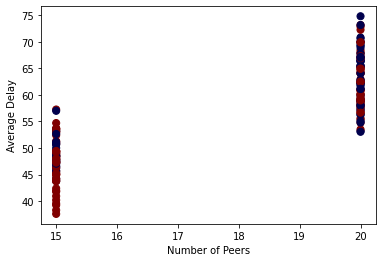

In [7]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from ipywidgets import interact ,fixed
#from matplotlib import pyplot as plt
import numpy as np
#import matplotlib.pyplot as plt
from sklearn import svm, datasets
from mpl_toolkits.mplot3d import Axes3D
dataset = pd.read_csv('/home/inlab/Downloads/data extraction_0125_v1.csv')
X = dataset.drop(['NoPeers','MaxDelay','MinDelay','IsTrustable'], axis=1)
#X = dataset.[:, :3]  # we only take the first three features.
y = dataset['IsTrustable']

plt.scatter(X.iloc[:,0],X.iloc[:,1], c=y, s=50, cmap='seismic')
plt.xlabel('Number of Peers')
plt.ylabel('Average Delay')
plt.show()


